TASK 4: Sales Prediction (Simple Linear Regression)

NAME : PARTH BHADAURIA

BATCH : JULY

DOMAIN : DATA SCIENCE

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving advertising.csv to advertising.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv('advertising.csv')
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,0
TV,0
Radio,0
Newspaper,0
Sales,0


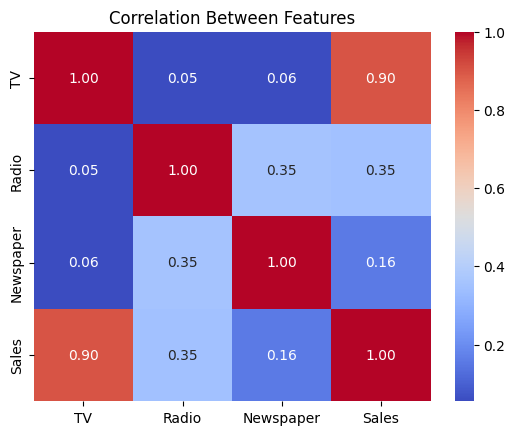

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Features")
plt.show()


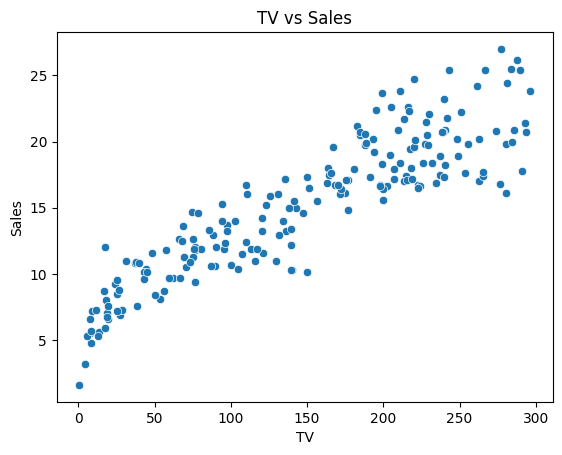

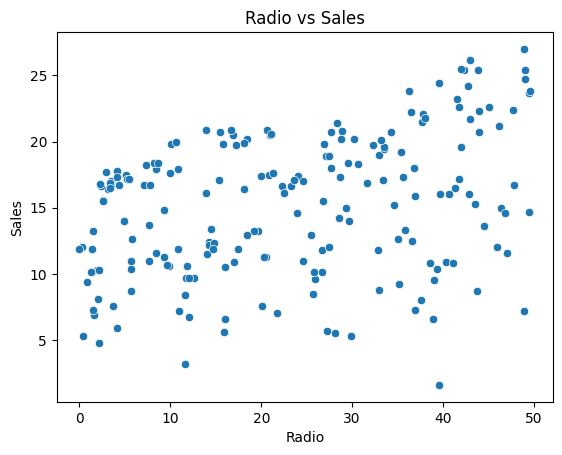

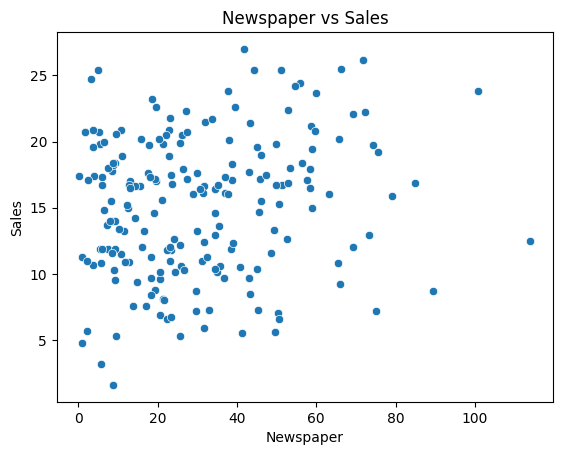

In [ ]:
features = ['TV', 'Radio', 'Newspaper']
for feature in features:
    sns.scatterplot(data=df, x=feature, y='Sales')
    plt.title(f'{feature} vs Sales')
    plt.show()


In [ ]:
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']                      # Target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 2.9077569102710896
R² Score: 0.9059011844150826


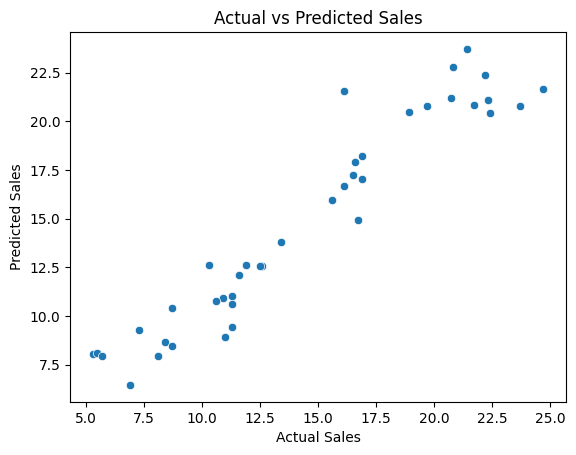

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [ ]:
# Example: Predict sales with custom advertising budget
example = [[150, 25, 15]]  # TV, Radio, Newspaper
predicted_sales = model.predict(example)
print("Predicted Sales:", predicted_sales[0])


Predicted Sales: 15.479200789951499


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


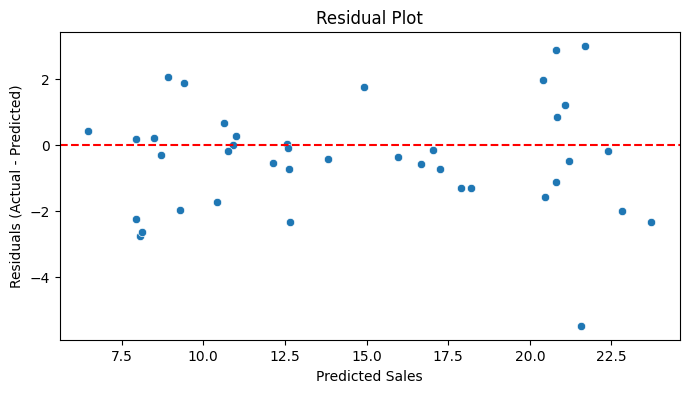

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


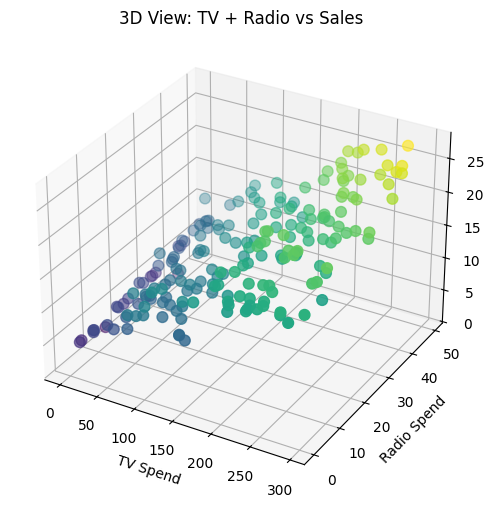

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['TV'], df['Radio'], df['Sales'], c=df['Sales'], cmap='viridis', s=60)
ax.set_xlabel('TV Spend')
ax.set_ylabel('Radio Spend')
ax.set_zlabel('Sales')
ax.set_title('3D View: TV + Radio vs Sales')

plt.show()


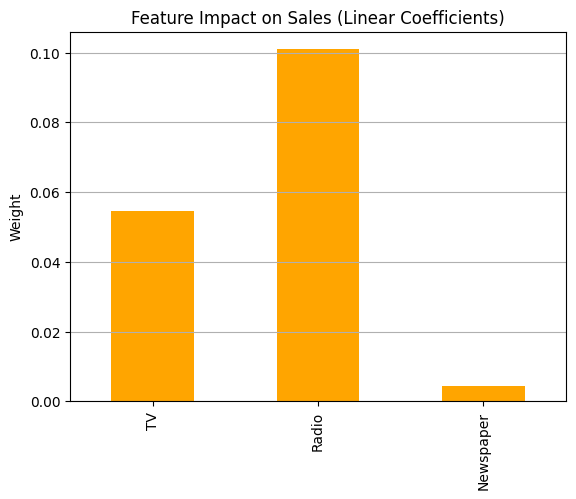

In [ ]:
coefficients = pd.Series(model.coef_, index=X.columns)

coefficients.plot(kind='bar', color='orange')
plt.title("Feature Impact on Sales (Linear Coefficients)")
plt.ylabel("Weight")
plt.grid(axis='y')
plt.show()
